##General preprocessing for Pandas and Graphics

In [3]:
from IPython.display import display
%pylab inline

import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [4]:
# compile the codes
!make

gcc -o ann_aq ann_aq.c -lfann -lm
# ls -al --color=auto
echo "Compilation is completed."
Compilation is completed.


In [5]:
# Testing ann_aq code
!./ann_aq

Usage-1: ann_aq mode
Usage-2: ann_aq mode param
Help: ann_aq
Where
  mode = xor, aq, aq_n
  param = desired_error
Input and output file:
  xor input  -> xor.data
  aq input   -> aq_1.data
  aq_n input -> aq_2.data, run -> aq_2_run.data, output -> aqnoutdata.csv


##XOR System Training
XOR system trainig is highly simple if the FANN tool is used. Usually, xor traning is not simple because it is so much nonlinear system. 
###I. Default mode for XOR

In [6]:
# Run ann_aq for xor
!./ann_aq xor
pd.read_csv( "xoroutdata.csv")

Run: ann_aq xor
xor
Traninig...
Max epochs    50000. Desired error: 0.0000100000.
Epochs            1. Current error: 0.2503222525. Bit fail 4.
Epochs           41. Current error: 0.0000097352. Bit fail 0.
Running...
"in0","in1","out"
1.000000,1.000000,-0.996502
1.000000,-1.000000,0.995184
-1.000000,1.000000,0.993520
-1.000000,-1.000000,-0.999579


,in0,in1,out
0,1,1,-0.996502
1,1,-1,0.995184
2,-1,1,0.993520
3,-1,-1,-0.999579


###II. Error is 0.1 for XOR 

In [7]:
# Run ann_aq for xor with different desired_error, which is 0.1
!./ann_aq xor 0.1
pd.read_csv("xoroutdata.csv")

Run: ann_aq xor 0.100000
Max epochs    50000. Desired error: 0.1000000015.
Epochs            1. Current error: 0.2504748702. Bit fail 4.
Epochs           17. Current error: 0.0991438478. Bit fail 2.
"in0","in1","out"
1.000000,1.000000,-0.591869
1.000000,-1.000000,0.339832
-1.000000,1.000000,0.283636
-1.000000,-1.000000,-0.821505


,in0,in1,out
0,1,1,-0.591869
1,1,-1,0.339832
2,-1,1,0.283636
3,-1,-1,-0.821505


##Quinone property of solvation free energy traning
###I. Default mode
Notice that the output value is normalized near -1 to 1, though the origianl value is upto -100. In nonlinear systems, for fast optimization the output value normalization is important.  
As the size of traning data set is not large and the error requirement is too strict, the optimization is over-fitted. Hence, more inut data is needed to find more relistic model. 

Run: ann_aq aq
aq_main
Traninig...
Max epochs    50000. Desired error: 0.0005000000.
Epochs            1. Current error: 0.3978246152. Bit fail 3.
Epochs        10000. Current error: 0.0010291733. Bit fail 0.
Epochs        20000. Current error: 0.0009197032. Bit fail 0.
Epochs        30000. Current error: 0.0007146553. Bit fail 0.
Epochs        38518. Current error: 0.0004999509. Bit fail 0.
Running...
"in","out"
1.000000, -0.198903
0.670000, -0.427023
0.650000, -0.478823
0.580000, -0.670021
0.270000, -1.021061
0.000000,-0.518613
0.100000,-0.746106
0.200000,-0.934508
0.300000,-1.042141
0.400000,-1.026384
0.500000,-0.870490
0.600000,-0.615081
0.700000,-0.354664
0.800000,-0.182114
0.900000,-0.135672
1.000000,-0.198903


,in,out
0,1.00,-0.198903
1,0.67,-0.427023
2,0.65,-0.478823
3,0.58,-0.670021
4,0.27,-1.021061
5,0.00,-0.518613
6,0.10,-0.746106
7,0.20,-0.934508
8,0.30,-1.042141
9,0.40,-1.026384


['in', 'out']


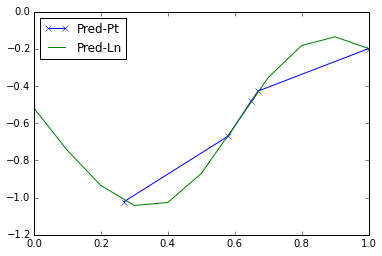

In [8]:
!./ann_aq aq
df_aq = pd.read_csv("aqoutdata.csv")
display( df_aq)

print df_aq.columns.tolist()
plot( df_aq['in'][0:5], df_aq['out'][0:5], 'x-', label='Pred-Pt')
plot( df_aq['in'][5:], df_aq['out'][5:], '-', label='Pred-Ln')
legend( loc=2)
show()

###II-A. Error value is controled to be large
By increasing error requirement, the overfitting is reduced. This can be monitored by input signalling. Since ANN is bliack box, investigation is necessary to understand the current state of the system. 

Run: ann_aq aq 0.000500
Max epochs    50000. Desired error: 0.0005000000.
Epochs            1. Current error: 0.3347407877. Bit fail 3.
Epochs        10000. Current error: 0.0010935593. Bit fail 0.
Epochs        20000. Current error: 0.0010907780. Bit fail 0.
Epochs        30000. Current error: 0.0010887866. Bit fail 0.
Epochs        40000. Current error: 0.0010868750. Bit fail 0.
Epochs        50000. Current error: 0.0010841939. Bit fail 0.
"in","out"
1.000000, -0.197500
0.670000, -0.441991
0.650000, -0.463933
0.580000, -0.547681
0.270000, -1.020590
0.000000,-1.437200
0.100000,-1.294613
0.200000,-1.136315
0.300000,-0.970724
0.400000,-0.807617
0.500000,-0.656064
0.600000,-0.522660
0.700000,-0.410740
0.800000,-0.320628
0.900000,-0.250521
1.000000,-0.197500


,in,out
0,1.00,-0.197500
1,0.67,-0.441991
2,0.65,-0.463933
3,0.58,-0.547681
4,0.27,-1.020590
5,0.00,-1.437200
6,0.10,-1.294613
7,0.20,-1.136315
8,0.30,-0.970724
9,0.40,-0.807617


['in', 'out']


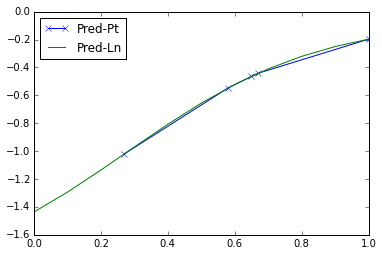

In [9]:
!./ann_aq aq 0.0005
df_aq = pd.read_csv("aqoutdata.csv")
display( df_aq)

print df_aq.columns.tolist()
plot( df_aq['in'][0:5], df_aq['out'][0:5], 'x-', label='Pred-Pt')
plot( df_aq['in'][5:], df_aq['out'][5:], '-', label='Pred-Ln')
legend( loc=2)
show()

###II-A. Error value is controled to be samll (0.00001)

Run: ann_aq aq 0.000010
Max epochs    50000. Desired error: 0.0000100000.
Epochs            1. Current error: 0.3258907199. Bit fail 2.
Epochs        10000. Current error: 0.0008918596. Bit fail 0.
Epochs        20000. Current error: 0.0006537472. Bit fail 0.
Epochs        30000. Current error: 0.0003416498. Bit fail 0.
Epochs        40000. Current error: 0.0001444594. Bit fail 0.
Epochs        50000. Current error: 0.0000796258. Bit fail 0.
"in","out"
1.000000, -0.199367
0.670000, -0.408138
0.650000, -0.497946
0.580000, -0.844126
0.270000, -1.020511
0.000000,0.223011
0.100000,-0.237877
0.200000,-0.718088
0.300000,-1.128827
0.400000,-1.328380
0.500000,-1.184631
0.600000,-0.743951
0.700000,-0.289007
0.800000,-0.061561
0.900000,-0.067666
1.000000,-0.199368


,in,out
0,1.00,-0.199367
1,0.67,-0.408138
2,0.65,-0.497946
3,0.58,-0.844126
4,0.27,-1.020511
5,0.00,0.223011
6,0.10,-0.237877
7,0.20,-0.718088
8,0.30,-1.128827
9,0.40,-1.328380


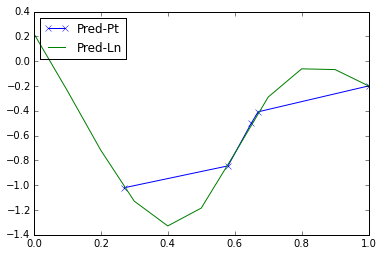

In [10]:
!./ann_aq aq 0.00001
#pd.read_csv("aqoutdata.csv")
df_aq = pd.read_csv("aqoutdata.csv")
display( df_aq)

# print df_aq.columns.tolist()
plot( df_aq['in'][0:5], df_aq['out'][0:5], 'x-', label='Pred-Pt')
plot( df_aq['in'][5:], df_aq['out'][5:], '-', label='Pred-Ln')
legend( loc=2)
show()

###III-A. The number of input variables are controlled: 1 --> More than 1 (with smaller error)

Run: ann_aq aq_n 0.000050
Max epochs    50000. Desired error: 0.0000500000.
Epochs            1. Current error: 0.3222029209. Bit fail 2.
Epochs        10000. Current error: 0.0004975004. Bit fail 0.
Epochs        20000. Current error: 0.0002160337. Bit fail 0.
Epochs        30000. Current error: 0.0000916205. Bit fail 0.
Epochs        38651. Current error: 0.0000499941. Bit fail 0.
"in0","in1","out"
1.000000,0.280000,-0.196322
0.670000,0.460000,-0.406505
0.650000,0.410000,-0.502643
0.580000,0.490000,-0.615944
0.280000,1.000000,-1.019261


,in0,in1,out
0,1.00,0.28,-0.196322
1,0.67,0.46,-0.406505
2,0.65,0.41,-0.502643
3,0.58,0.49,-0.615944
4,0.28,1.00,-1.019261


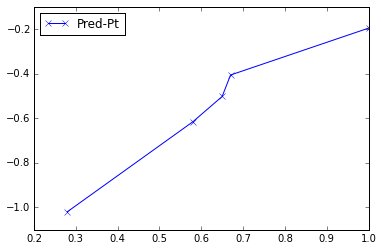

In [11]:
!./ann_aq aq_n 0.00005
df_aqn = pd.read_csv("aqnoutdata.csv")
display( df_aqn)

# print df_aqn.columns.tolist()
plot( df_aqn['in0'][0:5], df_aqn['out'][0:5], 'x-', label='Pred-Pt')
#plot( df_aqn['in0'][5:], df_aqn['out'][5:], '-', label='Pred-Ln')
legend( loc=2)
show()

###III-B. The number of input variables are controlled: 1 --> More than 1 (with much smaller error)
Even if the error is changed to be small, the output looks smooth. This model can also be investigated, while the investigation method is required to be develped because of the first input and the second is correlated in real system. In general, 3D investigation approach can be used.  

Run: ann_aq aq_n 0.000000
Max epochs    50000. Desired error: 0.0000001000.
Epochs            1. Current error: 0.4041288495. Bit fail 3.
Epochs        10000. Current error: 0.0000016594. Bit fail 0.
Epochs        20000. Current error: 0.0000033418. Bit fail 0.
Epochs        30000. Current error: 0.0000052022. Bit fail 0.
Epochs        40000. Current error: 0.0000144360. Bit fail 0.
Epochs        50000. Current error: 0.0000080991. Bit fail 0.
"in0","in1","out"
1.000000,0.280000,-0.200305
0.670000,0.460000,-0.399181
0.650000,0.410000,-0.506131
0.580000,0.490000,-0.563070
0.280000,1.000000,-0.997000


,in0,in1,out
0,1.00,0.28,-0.200305
1,0.67,0.46,-0.399181
2,0.65,0.41,-0.506131
3,0.58,0.49,-0.563070
4,0.28,1.00,-0.997000


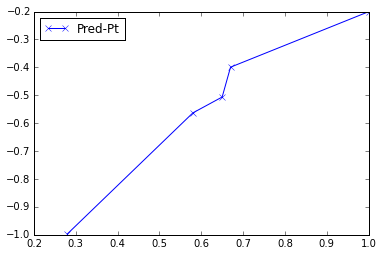

In [12]:
!./ann_aq aq_n 0.0000001
df_aqn = pd.read_csv("aqnoutdata.csv")
display( df_aqn)

# print df_aqn.columns.tolist()
plot( df_aqn['in0'][0:5], df_aqn['out'][0:5], 'x-', label='Pred-Pt')
#plot( df_aqn['in0'][5:], df_aqn['out'][5:], '-', label='Pred-Ln')
legend( loc=2)
show()